In [19]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats
from scipy.stats import linregress

In [20]:
all_data = pd.read_csv("all_data.csv")
all_data

,Unnamed: 0,Year_x,Period,Avg hrs per day sleeping,Standard Error,Type of Days,Age Group_x,Activity,Gender_x,Unique ID,Age Group_y,Year_y,Gender_y,Number with income (thousands),Mean income,2022\ndollars
0,0,2003,Annual,8.48,0.031,All days,15 years and over,Sleeping,Male,2003-15 years and over-Male,15 years and over,2003,Male,100800,41480,63070
1,1,2003,Annual,8.16,0.039,Nonholiday weekdays,15 years and over,Sleeping,Male,2003-15 years and over-Male,15 years and over,2003,Male,100800,41480,63070
2,2,2003,Annual,9.22,0.044,Weekend days and holidays,15 years and over,Sleeping,Male,2003-15 years and over-Male,15 years and over,2003,Male,100800,41480,63070
3,3,2004,Annual,8.48,0.040,All days,15 years and over,Sleeping,Male,2004-15 years and over-Male,15 years and over,2004,Male,101800,42830,63530
4,4,2004,Annual,8.16,0.053,Nonholiday weekdays,15 years and over,Sleeping,Male,2004-15 years and over-Male,15 years and over,2004,Male,101800,42830,63530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,913,2017,Annual,8.81,0.091,Nonholiday weekdays,65 years and over,Sleeping,Female,2017-65 years and over-Female,65 years and over,2017,Female,"26,800","29,750","35,080"
914,914,2017,Annual,8.81,0.091,Nonholiday weekdays,65 years and over,Sleeping,Female,2017-65 years and over-Female,65 years and over,2017,Female,"15,310","34,140","40,250"
915,915,2017,Annual,8.81,0.091,Nonholiday weekdays,65 years and over,Sleeping,Female,2017-65 years and over-Female,65 years and over,2017,Female,"15,390","32,750","38,610"
916,916,2017,Annual,8.81,0.091,Nonholiday weekdays,65 years and over,Sleeping,Female,2017-65 years and over-Female,65 years and over,2017,Female,"11,450","25,790","30,410"


In [21]:
twentyfive_df = all_data.loc[(all_data['Age Group_x'] == '25 to 34 years') & (all_data['Age Group_y'] == '25 to 34 years') ]
twentyfive_df.head()

,Unnamed: 0,Year_x,Period,Avg hrs per day sleeping,Standard Error,Type of Days,Age Group_x,Activity,Gender_x,Unique ID,Age Group_y,Year_y,Gender_y,Number with income (thousands),Mean income,2022\ndollars
102,102,2003,Annual,8.30,0.066,All days,25 to 34 years,Sleeping,Male,2003-25 to 34 years-Male,25 to 34 years,2003,Male,18680,37170,56520
103,103,2003,Annual,7.91,0.079,Nonholiday weekdays,25 to 34 years,Sleeping,Male,2003-25 to 34 years-Male,25 to 34 years,2003,Male,18680,37170,56520
104,104,2003,Annual,9.23,0.106,Weekend days and holidays,25 to 34 years,Sleeping,Male,2003-25 to 34 years-Male,25 to 34 years,2003,Male,18680,37170,56520
105,105,2004,Annual,8.42,0.118,All days,25 to 34 years,Sleeping,Male,2004-25 to 34 years-Male,25 to 34 years,2004,Male,18730,37360,55410
106,106,2004,Annual,8.00,0.157,Nonholiday weekdays,25 to 34 years,Sleeping,Male,2004-25 to 34 years-Male,25 to 34 years,2004,Male,18730,37360,55410


In [22]:
twentyfive_df_male = twentyfive_df.loc[(twentyfive_df['Gender_x' ] == 'Male')]
twentyfive_df_male = twentyfive_df_male[['Unique ID','Year_x','Avg hrs per day sleeping','Mean income']]
twentyfive_df_male.columns =['Unique ID','Year','Male Avg Sleep','Male Avg income']



twentyfive_df_female = twentyfive_df.loc[(twentyfive_df['Gender_x' ] == 'Female')]
twentyfive_df_female = twentyfive_df_female[['Unique ID','Year_x','Avg hrs per day sleeping','Mean income']]
twentyfive_df_female.columns =['Unique ID','Year','Female Avg Sleep','Female Avg income']


all_twentyfive_df_mvf = pd.merge(twentyfive_df_male,twentyfive_df_female, on = 'Year', how = 'inner')
all_twentyfive_df_mvf

,Unique ID_x,Year,Male Avg Sleep,Male Avg income,Unique ID_y,Female Avg Sleep,Female Avg income
0,2003-25 to 34 years-Male,2003,8.30,37170,2003-25 to 34 years-Female,8.73,26760
1,2003-25 to 34 years-Male,2003,8.30,37170,2003-25 to 34 years-Female,9.45,26760
2,2003-25 to 34 years-Male,2003,8.30,37170,2003-25 to 34 years-Female,8.44,26760
3,2003-25 to 34 years-Male,2003,7.91,37170,2003-25 to 34 years-Female,8.73,26760
4,2003-25 to 34 years-Male,2003,7.91,37170,2003-25 to 34 years-Female,9.45,26760
...,...,...,...,...,...,...,...
184,2017-25 to 34 years-Male,2017,9.45,52340,2017-25 to 34 years-Female,9.04,38100
185,2017-25 to 34 years-Male,2017,9.45,52340,2017-25 to 34 years-Female,9.68,37830
186,2017-25 to 34 years-Male,2017,9.45,52340,2017-25 to 34 years-Female,9.68,38100
187,2017-25 to 34 years-Male,2017,9.45,52340,2017-25 to 34 years-Female,8.78,37830


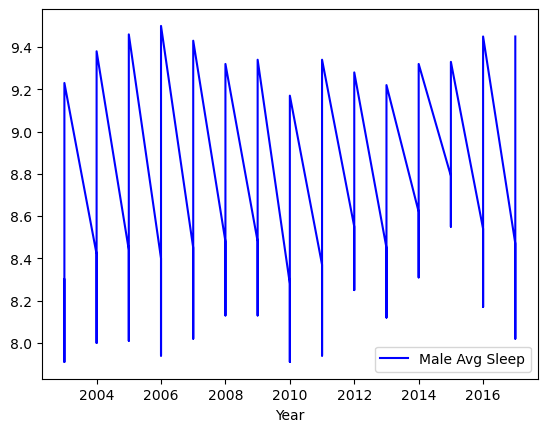

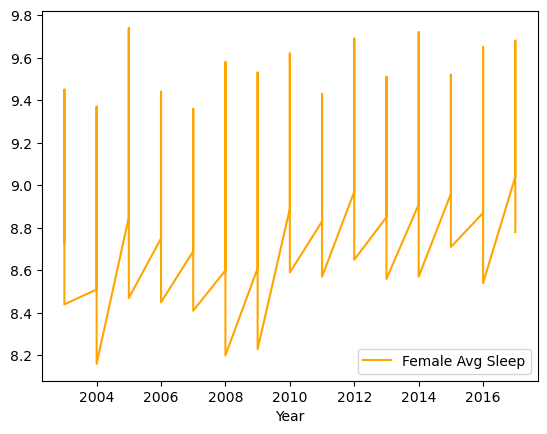

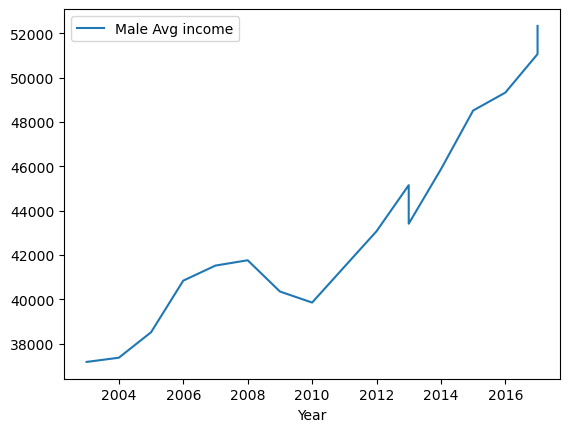

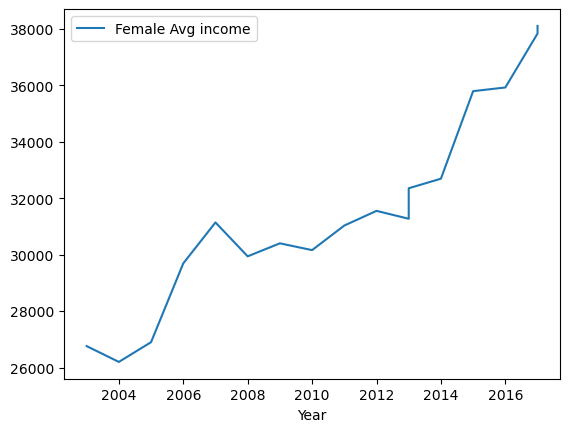

<Figure size 640x480 with 0 Axes>

In [51]:
all_twentyfive_df_mvf['Year'] = all_twentyfive_df_mvf['Year'].astype(int)

all_twentyfive_df_mvf['Male Avg income'] = all_twentyfive_df_mvf['Male Avg income'].astype(int)    
all_twentyfive_df_mvf['Female Avg income'] = all_twentyfive_df_mvf['Female Avg income'].astype(int)  
    
#make line charts
all_twentyfive_df_mvf.plot('Year', 'Male Avg Sleep',color = 'blue')
all_twentyfive_df_mvf.plot('Year', 'Female Avg Sleep',color = 'orange')
all_twentyfive_df_mvf.plot('Year', 'Male Avg income')
all_twentyfive_df_mvf.plot ('Year', 'Female Avg income')

plt.show()
plt.savefig('line_graphs.png')


In [53]:
thirtyfive_df = all_data.loc[(all_data['Age Group_x'] == '35 to 44 years') & (all_data['Age Group_y'] == '35 to 44 years') ]
thirtyfive_df.head()

,Unnamed: 0,Year_x,Period,Avg hrs per day sleeping,Standard Error,Type of Days,Age Group_x,Activity,Gender_x,Unique ID,Age Group_y,Year_y,Gender_y,Number with income (thousands),Mean income,2022\ndollars
153,153,2003,Annual,8.20,0.059,All days,35 to 44 years,Sleeping,Male,2003-35 to 44 years-Male,35 to 44 years,2003,Male,"19,420","55,310","84,090"
154,154,2003,Annual,7.86,0.075,Nonholiday weekdays,35 to 44 years,Sleeping,Male,2003-35 to 44 years-Male,35 to 44 years,2003,Male,"19,420","55,310","84,090"
155,155,2003,Annual,9.00,0.070,Weekend days and holidays,35 to 44 years,Sleeping,Male,2003-35 to 44 years-Male,35 to 44 years,2003,Male,"19,420","55,310","84,090"
156,156,2004,Annual,8.20,0.085,All days,35 to 44 years,Sleeping,Male,2004-35 to 44 years-Male,35 to 44 years,2004,Male,"19,800","56,920","84,420"
157,157,2004,Annual,7.88,0.111,Nonholiday weekdays,35 to 44 years,Sleeping,Male,2004-35 to 44 years-Male,35 to 44 years,2004,Male,"19,800","56,920","84,420"


In [54]:
thirtyfive_df_male = thirtyfive_df.loc[(thirtyfive_df['Gender_x' ] == 'Male')]
thirtyfive_df_male = thirtyfive_df_male[['Unique ID','Year_x','Avg hrs per day sleeping','Mean income']]
thirtyfive_df_male.columns =['Unique ID','Year','Male Avg Sleep','Male Avg income']



thirtyfive_df_female = thirtyfive_df.loc[(thirtyfive_df['Gender_x' ] == 'Female')]
thirtyfive_df_female = thirtyfive_df_female[['Unique ID','Year_x','Avg hrs per day sleeping','Mean income']]
thirtyfive_df_female.columns =['Unique ID','Year','Female Avg Sleep','Female Avg income']


all_thirtyfive_df_mvf = pd.merge(thirtyfive_df_male,thirtyfive_df_female, on = 'Year', how = 'inner')
all_thirtyfive_df_mvf

,Unique ID_x,Year,Male Avg Sleep,Male Avg income,Unique ID_y,Female Avg Sleep,Female Avg income
0,2003-35 to 44 years-Male,2003,8.20,"55,310",2003-35 to 44 years-Female,8.48,29850
1,2003-35 to 44 years-Male,2003,8.20,"55,310",2003-35 to 44 years-Female,9.31,29850
2,2003-35 to 44 years-Male,2003,8.20,"55,310",2003-35 to 44 years-Female,8.13,29850
3,2003-35 to 44 years-Male,2003,7.86,"55,310",2003-35 to 44 years-Female,8.48,29850
4,2003-35 to 44 years-Male,2003,7.86,"55,310",2003-35 to 44 years-Female,9.31,29850
...,...,...,...,...,...,...,...
184,2017-35 to 44 years-Male,2017,9.28,"74,950",2017-35 to 44 years-Female,8.77,47380
185,2017-35 to 44 years-Male,2017,9.28,"74,950",2017-35 to 44 years-Female,9.46,47940
186,2017-35 to 44 years-Male,2017,9.28,"74,950",2017-35 to 44 years-Female,9.46,47380
187,2017-35 to 44 years-Male,2017,9.28,"74,950",2017-35 to 44 years-Female,8.48,47940


TypeError: no numeric data to plot

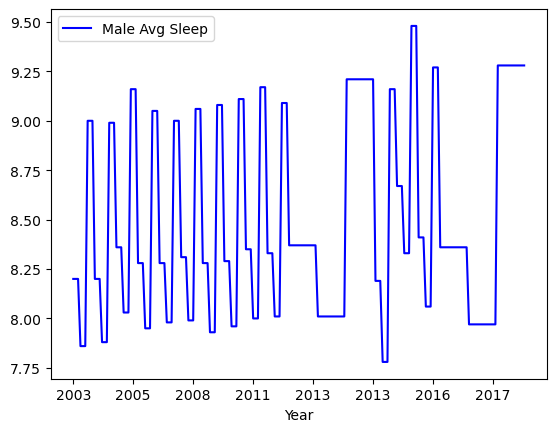

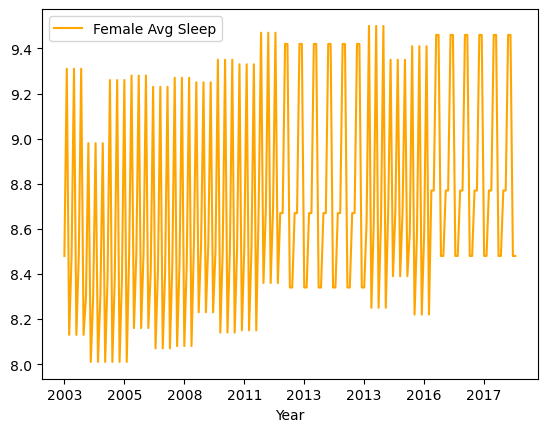

In [57]:
all_thirtyfive_df_mvf['Year'] = all_thirtyfive_df_mvf['Year'].astype(str)

all_thirtyfive_df_mvf['Male Avg income'] = all_thirtyfive_df_mvf['Male Avg income'].astype(str)    
all_thirtyfive_df_mvf['Female Avg income'] = all_thirtyfive_df_mvf['Female Avg income'].astype(str)  
    
#make line charts
all_thirtyfive_df_mvf.plot('Year', 'Male Avg Sleep',color = 'blue')
all_thirtyfive_df_mvf.plot('Year', 'Female Avg Sleep',color = 'orange')
all_thirtyfive_df_mvf.plot('Year', 'Male Avg income')
all_thirtyfive_df_mvf.plot ('Year', 'Female Avg income')

plt.show()
plt.savefig('line_graphs.png')
